2. KOSPI에 계절성이 존재하는가? KOSPI에 매수하기 좋은 달과 매도하기 좋은 달이 있을까? 4월에 매수하기 좋고 9월에 매도하기 좋다는데 월별 추이가 맞을까? 확인해오기. 
(https://www.notion.so/snoop2head/YIG-fa8cdeb837d9456baf16ee64d3c055d7)

In [19]:
# 데이터 분석을 위한 pandas, 시각화를 위한 matplotlib, 주가 데이터 수집을 위한 FinanceDataReader
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

In [20]:
# get KOSPI dataset (starts from 2015)
df = fdr.DataReader('KS11', '1980-01-01') # 코스피
df.shape

(10762, 6)

In [21]:
# 일별 시세 미리보기
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098
1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008
1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235
1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008
1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116


In [22]:
df.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-08-02,3223.04,3218.42,3223.04,3194.00,561000000.0,0.0065
2021-08-03,3237.14,3221.57,3237.14,3213.20,653510000.0,0.0044
2021-08-04,3280.38,3246.65,3283.14,3237.55,632240000.0,0.0134
2021-08-05,3276.13,3283.25,3296.17,3273.33,680940000.0,-0.0013
2021-08-06,3270.36,3277.06,3288.17,3261.93,930910.0,-0.0018


In [23]:
# resample by month and get monthly mean
# Year-Month-Date

df["Close"].resample("M").mean()

Date
1981-05-31     121.766667
1981-06-30     137.104000
1981-07-31     154.842308
1981-08-31     145.368000
1981-09-30     141.528000
                 ...     
2021-04-30    3165.083182
2021-05-31    3169.200526
2021-06-30    3259.140000
2021-07-31    3254.573182
2021-08-31    3257.410000
Freq: M, Name: Close, Length: 484, dtype: float64

<AxesSubplot:xlabel='Date'>

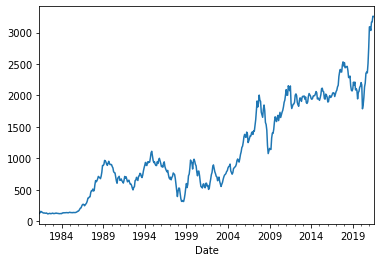

In [24]:
# visualize monthly mean as line chart
df["Close"].resample("M").mean().plot()

In [34]:
df["Close"].resample("M").mean().diff()

Date
1981-05-31           NaN
1981-06-30     15.337333
1981-07-31     17.738308
1981-08-31     -9.474308
1981-09-30     -3.840000
                 ...    
2021-04-30    132.614091
2021-05-31      4.117344
2021-06-30     89.939474
2021-07-31     -4.566818
2021-08-31      2.836818
Freq: M, Name: Close, Length: 484, dtype: float64

In [ ]:
def first_day(entry):
    return entry[0]

beginning_price = KS_close.resample('M').apply(first_day)

In [36]:
df["Close"].resample("M").median().pct_change()
# percent change라는 함수를 쓰기 전에, 

Date
1981-05-31         NaN
1981-06-30    0.141680
1981-07-31    0.122655
1981-08-31   -0.070694
1981-09-30   -0.017981
                ...   
2021-04-30    0.043613
2021-05-31   -0.002318
2021-06-30    0.028390
2021-07-31   -0.001209
2021-08-31    0.005817
Freq: M, Name: Close, Length: 484, dtype: float64

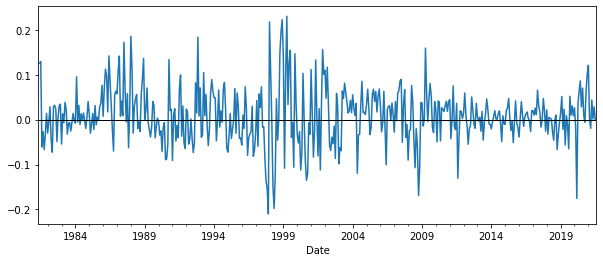

In [25]:
# get percent change of monthly mean
month_change =  df["Close"].resample("M").mean().pct_change()
month_change.plot(figsize=(10, 4))

# notate month on x axis plot
plt.axhline(0, c="k", lw=1)

In [26]:
# group by month and summate 
sum_monthly_change = month_change.groupby([lambda x: x.month]).sum()
sum_monthly_change

1     0.765839
2     0.415786
3     0.076850
4     0.857306
5    -0.068459
6     0.408601
7     0.567109
8    -0.201358
9    -0.081023
10    0.040587
11    0.697098
12    0.705940
Name: Close, dtype: float64

([<matplotlib.axis.XTick at 0x127093b80>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

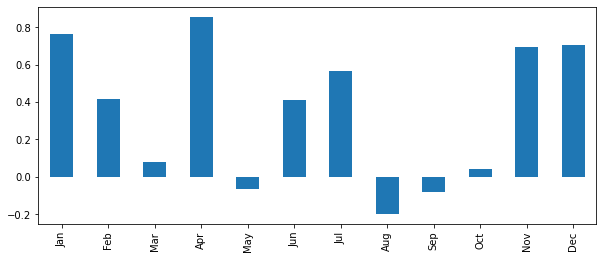

In [27]:
# visualize monthly change on a bar chart
sum_monthly_change.plot(kind="bar", figsize=(10, 4))
# set axis labels as month name
plt.xticks(range(0,12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

In [28]:
percent_month_change = month_change + 1
percent_month_change

Date
1981-05-31         NaN
1981-06-30    1.125957
1981-07-31    1.129378
1981-08-31    0.938813
1981-09-30    0.973584
                ...   
2021-04-30    1.043731
2021-05-31    1.001301
2021-06-30    1.028379
2021-07-31    0.998599
2021-08-31    1.000872
Freq: M, Name: Close, Length: 484, dtype: float64

In [29]:
# group by month and multiply 
multiplied_monthly_change = percent_month_change.groupby([lambda x: x.month]).prod()
multiplied_monthly_change

1     1.952218
2     1.442206
3     1.014087
4     2.145796
5     0.873107
6     1.395961
7     1.638424
8     0.776758
9     0.879209
10    0.952835
11    1.814008
12    1.852351
Name: Close, dtype: float64

([<matplotlib.axis.XTick at 0x1278472e0>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

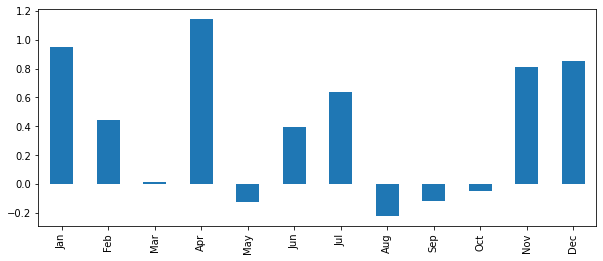

In [30]:
# visualize monthly change on a bar chart
multiplied_monthly_change_plot = multiplied_monthly_change - 1
multiplied_monthly_change_plot.plot(kind="bar", figsize=(10, 4))
# set axis labels as month name
plt.xticks(range(0,12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

In [37]:
# show information about dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10762 entries, 1981-05-01 to 2021-08-06
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   10762 non-null  float64
 1   Open    10762 non-null  float64
 2   High    10762 non-null  float64
 3   Low     10762 non-null  float64
 4   Volume  10762 non-null  float64
 5   Change  10762 non-null  float64
dtypes: float64(6)
memory usage: 588.5 KB


In [39]:
# show monthly changes of the dataframe value
df.resample("M").mean().diff()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1981-05-31,NaN,NaN,NaN,NaN,NaN,NaN
1981-06-30,15.337333,15.337333,15.337333,15.337333,8.670083e+05,0.005879
1981-07-31,17.738308,17.738308,17.738308,17.738308,-7.358769e+05,-0.007777
1981-08-31,-9.474308,-9.474308,-9.474308,-9.474308,-7.538831e+05,-0.001595
1981-09-30,-3.840000,-3.840000,-3.840000,-3.840000,-5.236000e+04,-0.000072
...,...,...,...,...,...,...
2021-04-30,132.614091,131.620455,123.045455,139.362273,1.429773e+08,0.000509
2021-05-31,4.117344,4.483062,8.946244,-2.705502,-4.228484e+08,-0.000323
2021-06-30,89.939474,87.953301,82.653301,98.350048,6.182729e+08,0.000346
